In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import DiadFit as pf
pf.__version__

'0.0.47'

## Other optios
- PT 100 probe, $600, 
https://www.vfcdataloggers.com/precision-handheld-pt100-digital-thermometer-accd370p
accuracy +0.1C 
doesnt say probe diameter

- https://www.omega.com/en-us/temperature-measurement/temperature-probes/probes-with-lead-wires/tj36-icin/p/TJ36-CPSS-18G-6-SMPW-M?gclsrc=aw.ds&gclid=CjwKCAiAioifBhAXEiwApzCzttm64fdjaE-Dheq7Sq7i2BrHulnBaL2fCQM2hEwxbrf2wbevd0qnLRoCMkMQAvD_BwE

In [3]:
## what about 0.5 C

In [32]:
import CoolProp.CoolProp as cp
P=np.linspace(1, 35, 1000)
T1=37+273.15

T2=37+0.5+273.15
T2m=37-0.5+273.15

T3=37+0.1+273.15
T3m=37-0.1+273.15

T4=37+0.3+273.15
T4m=37-0.3+273.15

T5=37+0.05+273.15
T5m=37-0.05+273.15
SW1996_CritT1=cp.PropsSI('D', 'P', P*10**6, 'T',T1 , 'CO2')/1000
SW1996_CritT2=cp.PropsSI('D', 'P', P*10**6, 'T',T2 , 'CO2')/1000
SW1996_CritT3=cp.PropsSI('D', 'P', P*10**6, 'T',T3 , 'CO2')/1000
SW1996_CritT4=cp.PropsSI('D', 'P', P*10**6, 'T',T4 , 'CO2')/1000
SW1996_CritT5=cp.PropsSI('D', 'P', P*10**6, 'T',T5 , 'CO2')/1000

SW1996_CritT2m=cp.PropsSI('D', 'P', P*10**6, 'T',T2m , 'CO2')/1000
SW1996_CritT3m=cp.PropsSI('D', 'P', P*10**6, 'T',T3m , 'CO2')/1000
SW1996_CritT4m=cp.PropsSI('D', 'P', P*10**6, 'T',T4m , 'CO2')/1000
SW1996_CritT5m=cp.PropsSI('D', 'P', P*10**6, 'T',T5m , 'CO2')/1000


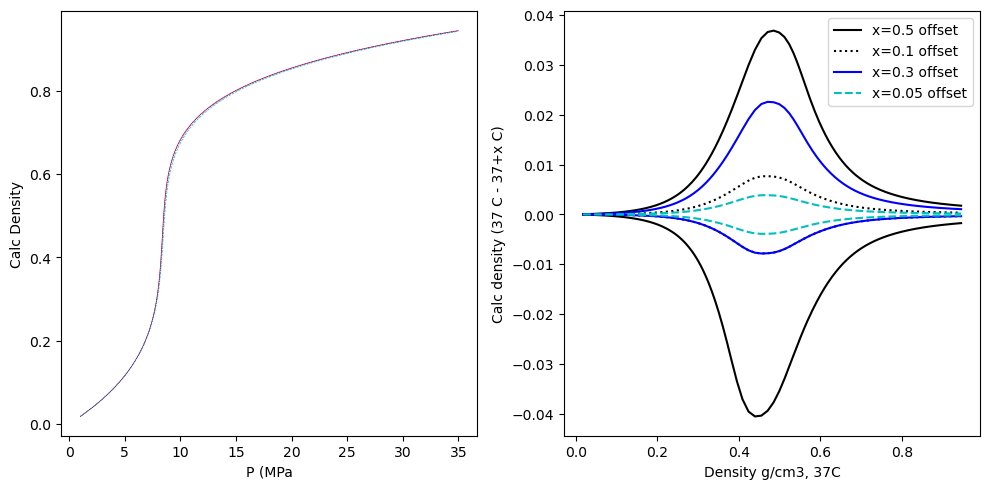

In [34]:


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(P, SW1996_CritT1, '-r', lw=0.5)
ax1.plot(P, SW1996_CritT2, '--c', lw=0.5)
ax1.plot(P, SW1996_CritT3, ':b',  lw=0.5)
ax2.plot(SW1996_CritT1, SW1996_CritT1-SW1996_CritT2, '-k', label='x=0.5 offset')
ax2.plot(SW1996_CritT1, SW1996_CritT1-SW1996_CritT3, ':k', label='x=0.1 offset')
ax2.plot(SW1996_CritT1, SW1996_CritT1-SW1996_CritT4, '-b', label='x=0.3 offset')
ax2.plot(SW1996_CritT1, SW1996_CritT1-SW1996_CritT5, '--c', label='x=0.05 offset')

ax2.plot(SW1996_CritT1, SW1996_CritT1-SW1996_CritT2m, '-k')
ax2.plot(SW1996_CritT1, SW1996_CritT1-SW1996_CritT3m, ':k')
ax2.plot(SW1996_CritT1, SW1996_CritT1-SW1996_CritT4m, '-b')
ax2.plot(SW1996_CritT1, SW1996_CritT1-SW1996_CritT5m, '--c')

ax1.set_xlabel('P (MPa')
ax1.set_ylabel('Calc Density')
ax2.set_xlabel('Density g/cm3, 37C')
ax2.set_ylabel('Calc density (37 C - 37+x C)')
fig.tight_layout()
ax2.legend()